## What are vectors in mongoDB?

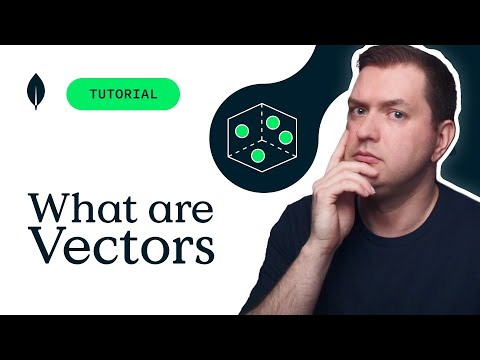

In [1]:
from IPython.display import YouTubeVideo, display

video_id = '1ZIYVNvRVsY'
video = YouTubeVideo(video_id)
display(video)

# Link: https://www.youtube.com/watch?v=bBA9rUdqmgY


## Index vector embeddings for vector search

Reference:

https://www.mongodb.com/docs/atlas/atlas-search/field-types/knn-vector/



## Create KNN index on the specifiations of the data format in the database

In [ ]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")  # Replace with your MongoDB connection string
db = client["your_database_name"]  # Replace with your database name
collection = db["your_collection_name"]  # Replace with your collection name

# Define KNN index specification
knn_index_spec = {
    "mappings": {
        "name": "vector_index",
        "dynamic": False,
        "fields": {
            "embedding": {
                "type": "knnVector",
                "dimensions": 100,  # Example: 100 dimensions for your vector
                "similarity": "cosine"
            }
        }
    }
}

# Create the KNN index
result = db.command("createIndexes", "your_collection_name", indexes=[knn_index_spec])

# Print the result
print(result)


## Update existing documents with vector embeddings

In [ ]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Replace with your MongoDB connection URI
db = client['your_database']  # Replace 'your_database' with your actual database name
collection = db['your_collection']  # Replace 'your_collection' with your actual collection name

# Define the vector values you want to add
vector_values = [0.1, 0.5, 0.3, ..., 0.9]  # Replace this with your actual vector values

# Update existing documents with vector embeddings
collection.update_many(
    {},  # Match all documents in the collection
    [
        {
            '$set': {
                'embedding': vector_values  # Add vector values to the 'embedding' field
            }
        }
    ]
)

# Verify the update
documents_with_embedding = collection.find({'embedding': {'$exists': True}})
for document in documents_with_embedding:
    print(document)


## Verify the update

In [ ]:
from pymongo import MongoClient

# MongoDB connection
client = MongoClient('mongodb://localhost:27017/')  # Connection URI, change it accordingly
db = client['your_database_name']  # Replace 'your_database_name' with your actual database name
collection = db['your_collection_name']  # Replace 'your_collection_name' with your actual collection name

# Update existing documents with vector embeddings
filter_query = {}  # Filter to match all documents in the collection
update_query = [
    {
        '$set': {
            "embedding": [0.1, 0.5, 0.3, ..., 0.9]  # Replace this with your actual vector values
        }
    }
]

result = collection.update_many(filter_query, update_query)

# Verify the update
if result.modified_count > 0:
    print(f"Updated {result.modified_count} documents.")
else:
    print("No documents were updated.")

# Verify the update by querying documents with the 'embedding' field
documents_with_embedding = collection.find({"embedding": {"$exists": True}})

# Print documents with embeddings
for doc in documents_with_embedding:
    print(doc)
